# Example - 63 - Locus of approach trajectories for constant inertial EFPA

In this example, we illustrate the locus of approach trajectories for constant inertial entry-flight path angle (EFPA) from an interplanetary trajectory.

<font color='red'>**Note**:</font> This example requires Mayavi for visualization and requires the following packages to be to be installed in your virtual env: ```pyqt5```, ```vtk```, ```mayavi```.

<font color='red'>**Note**:</font> For the 3D viz, tt is recommended that you run this example by running the python file using: ```python example-63-locus-of-approach-trajectories.py``` from your virtual env terminal instead of this Jupyter Notebook. If you use this Jupyter Notebook, then you need to have the following additional packages installed ```ipywidgets``` and ```ipyevents```, and must do ```jupyter nbextension install --py mayavi --user``` before you start the notebook.

In [2]:
from mayavi import mlab
mlab.init_notebook(backend='ipy')

import numpy as np

from tvtk.tools import visual
from AMAT.approach import Approach

Notebook initialized with ipy backend.


In [3]:
def Arrow_From_A_to_B(x1, y1, z1, x2, y2, z2):
    ar1 = visual.arrow(x=x1, y=y1, z=z1)
    ar1.length_cone = 0.4

    arrow_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    ar1.actor.scale = [arrow_length, arrow_length, arrow_length]
    ar1.pos = ar1.pos / arrow_length
    ar1.axis = [x2 - x1, y2 - y1, z2 - z1]
    return ar1

## Compute approach trajectories for psi = [0, 2pi]

In [4]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.040381198513972 * np.outer(np.cos(u), np.sin(v))
y1 = 1.040381198513972 * np.outer(np.sin(u), np.sin(v))
z1 = 1.040381198513972 * np.outer(np.ones(np.size(u)), np.cos(v))

x_ring_1 = 1.1 * np.cos(u)
y_ring_1 = 1.1 * np.sin(u)
z_ring_1 = 0.0 * np.cos(u)

x_ring_2 = 1.2 * np.cos(u)
y_ring_2 = 1.2 * np.sin(u)
z_ring_2 = 0.0 * np.cos(u)

mlab.figure(bgcolor=(0, 0, 0))
s1 = mlab.mesh(x, y, z, color=(0, 0, 1))
s2 = mlab.mesh(x1, y1, z1, color=(0, 0, 1), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1, 1, 1), line_width=1, tube_radius=None)
r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1, 1, 1), line_width=1, tube_radius=None)

for psi in np.linspace(0, 2 * np.pi, 31):
    probe = Approach("NEPTUNE",
                     v_inf_vec_icrf_kms=np.array([17.78952518, 8.62038536, 3.15801163]),
                     rp=(24622 + 400) * 1e3, psi=psi,
                     is_entrySystem=True, h_EI=1000e3)

    theta_star_arr_probe1 = np.linspace(-1.7, probe.theta_star_entry, 101)
    pos_vec_bi_arr_probe1 = probe.pos_vec_bi(theta_star_arr_probe1) / 24622e3

    x_arr_probe = pos_vec_bi_arr_probe1[0][:]
    y_arr_probe = pos_vec_bi_arr_probe1[1][:]
    z_arr_probe = pos_vec_bi_arr_probe1[2][:]

    mlab.plot3d(x_arr_probe, y_arr_probe, z_arr_probe, color=(1, 0, 0), line_width=3, tube_radius=None)

    if psi == 0:
        mlab.plot3d([0, 2 * probe.v_inf_vec_bi_unit[0]],
                    [0, 2 * probe.v_inf_vec_bi_unit[1]],
                    [0, 2 * probe.v_inf_vec_bi_unit[2]])

mlab.show()

## Plot the locus of approach trajectories

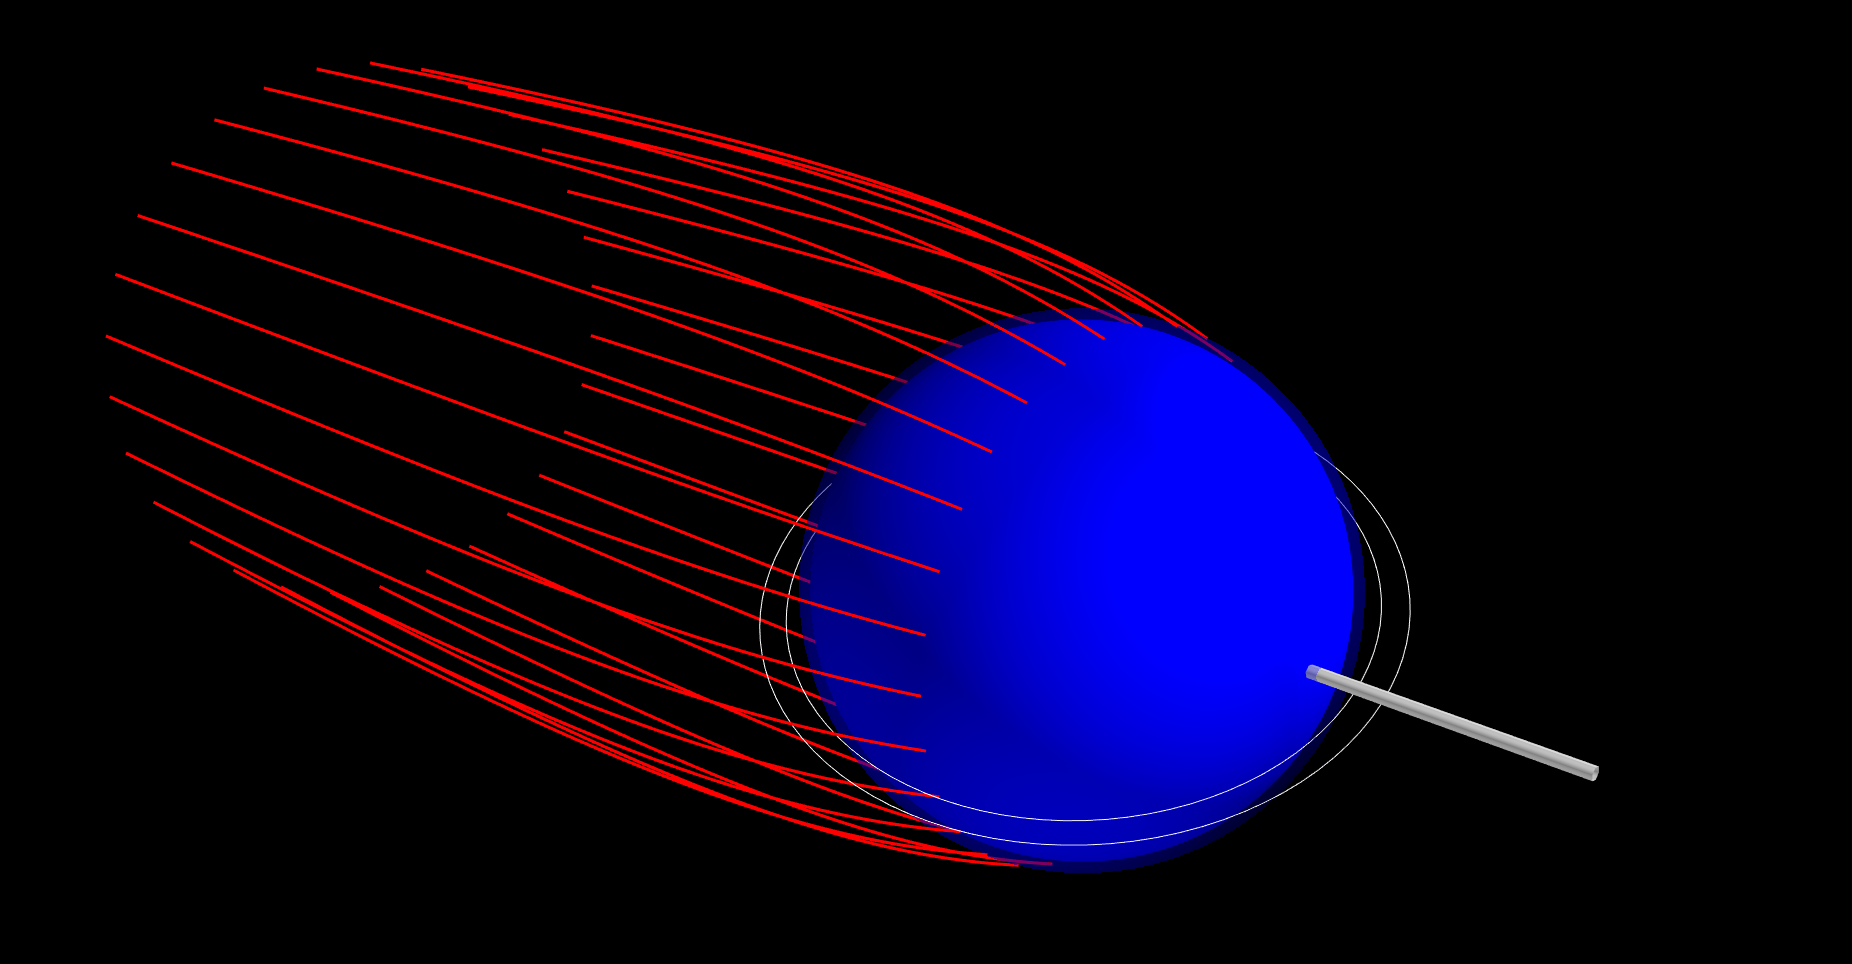

In [5]:
from IPython.display import Image
Image(filename="../plots/example-63-locus-of-approach-trajectories.png", width=800)